## NBA Team Net Ratings

Let's do some basic exploritory analysis on NBA games.

Each basketball game is won by a margin, say 8 points. To normalize for the pace of the game, there's "net rating" which is the delta in points scored per 100 possessions. This makes different games that were played at faster or slower paces comparable. A team's average net rating is the best single number for quantifying performance (save the win/loss record).

To start with we need a record of every NBA game this season and its net rating.

I boiled this down into a csv with the date, team name and net rating (each game will have two entries, but this is ok as we only look at per team stats). This csv was produced with a separate ruby script, but if you are curious, these two JSON endpoints from stats.nba.com were used:

- [The season game log](http://stats.nba.com/stats/leaguegamelog?Counter=1500&Direction=DESC&LeagueID=00&PlayerOrTeam=T&Season=2015-2016&SeasonType=Regular+Season&Sorter=PTS)
- [The advanced box score for a single game](http://stats.nba.com/stats/boxscoreadvancedv2?EndPeriod=10&EndRange=40800&GameID=0021500391&RangeType=0&Season=2015-16&SeasonType=Regular+Season&StartPeriod=1&StartRange=0)

Note that these endpoints are unofficial at best, and were sniffed out by looking at XHR requests in Chrome's developer tools while browsing stats.nba.com.

Let's load the data.

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

nba_games = []
fname = 'nba-games.csv'
with open(fname,"r") as f:
    # game_id,game_date,team_id,team_name,net_rating
    reader = csv.reader(f)
    next(reader)
    nba_games = list(reader)
    


Next, a function that extracts the net rating for a team. 

In [2]:
def team_net_ratings(the_team_name):
    """
    team name is one of 
    ["76ers", "Bucks", "Bulls", "Cavaliers", "Celtics", 
    "Clippers", "Grizzlies", "Hawks", "Heat", 
    "Hornets", "Jazz", "Kings", "Knicks", "Lakers", 
    "Magic", "Mavericks", "Nets", "Nuggets", "Pacers", 
    "Pelicans", "Pistons", "Raptors", "Rockets", "Spurs", 
    "Suns", "Thunder", "Timberwolves", "Trail Blazers", "Warriors", "Wizards"]    
    """
    return [
        float(net_rating)
        for game_id,game_date,team_id,team_name,net_rating in nba_games 
        if team_name == the_team_name]
    


### The Pistons

With this, we can make a histogram of the net ratings for a team. I like the Pistons, so let's check them out:

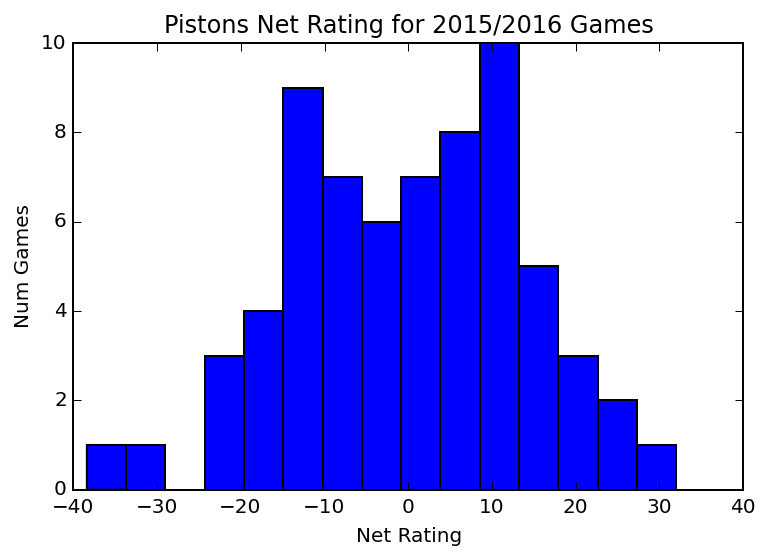

In [3]:
import matplotlib.mlab as mlab

plt.hist(team_net_ratings('Pistons'), bins=15)
plt.title("Pistons Net Rating for 2015/2016 Games")
plt.xlabel("Net Rating")
plt.ylabel("Num Games")

plt.show()

As experienced as a fan this year, we are a bit bi-modal, sometimes playing great, even beating some of the leagu's best teams, other times getting blown out (that -40 net rating was most recently against The Wizards).

### Best and worst teams

Now let's compare this to the best and worst teams in the league

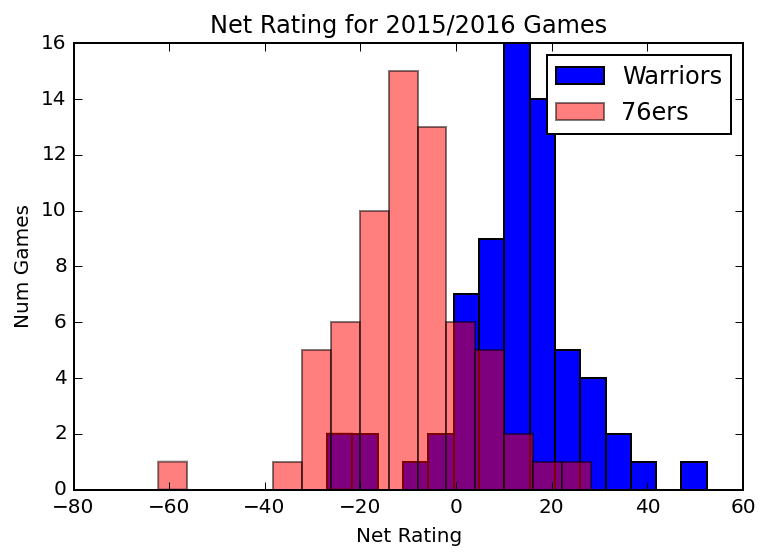

In [4]:
plt.hist(team_net_ratings("Warriors"), bins=15, color='b', label='Warriors')
plt.hist(team_net_ratings("76ers"), bins=15, color='r', alpha=0.5, label='76ers')
plt.title("Net Rating for 2015/2016 Games")
plt.xlabel("Net Rating")
plt.ylabel("Num Games")
plt.legend()
plt.show()    


Yep, the warriors usually win, and the 76ers usually lose. Still striking to see how many games the warriors win by a safe margin.

### Box Plots

Box plots are a nice way to visually compare multiple team's distributions giving a quick snapshot of the median, range and interquartile range. Let's compare the top 9 seeds in the Eastern Conference (I'm hoping the Pistons fight their way into the 8th seed, they are currently 9th).

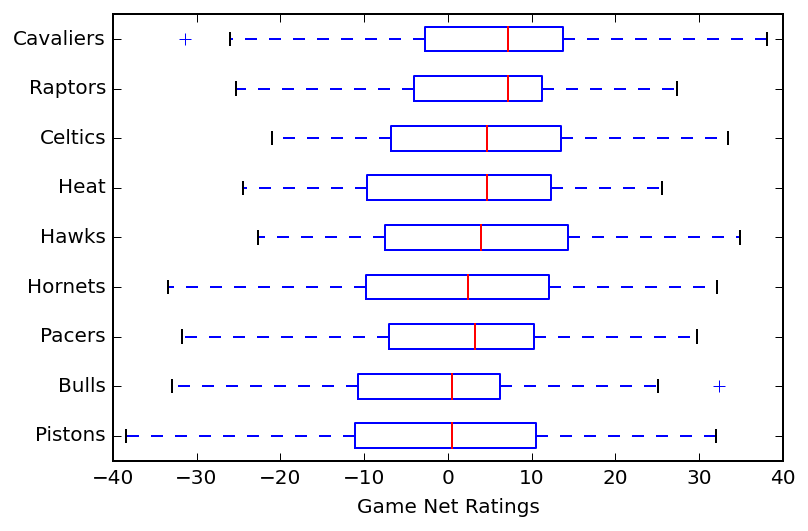

In [5]:
def box_plot_teams(team_names):
    reversed_names = list(reversed(team_names))
    data = [team_net_ratings(team_name) for team_name in reversed_names]
    plt.figure()
    plt.xlabel('Game Net Ratings')
    plt.boxplot(data, labels=reversed_names, vert=False)
    plt.show()
    
box_plot_teams(['Cavaliers', 'Raptors', 'Celtics', 'Heat', 'Hawks', 'Hornets', 'Pacers', 'Bulls', 'Pistons'])


We can see that The Pistons have the largest spread, but have a median slightly better than The Bulls (they are in fact neck and neck) with potentially more upside. The 3rd quartile net rating of close to 10 is what makes us Pistons fans feel like we could have a shot against most teams in The Eastern Conference.

Another note: the standard boxplot plots the dashed line up to 1.5 the IQR range, beyond that data points are considered outliers and plotted individually. The Pistons do not have any outliers by this standard; so on a given night we can get blown out or win big and it shouldn't really surprise use :)

Finally, let's look at the mean and standard deviations of each.

In [11]:
def mean_std(team_name):
    nrs = team_net_ratings(team_name)
    return (team_name, np.mean(nrs), np.std(nrs))

[mean_std(team_name) for team_name in 
 ['Cavaliers', 'Raptors', 'Celtics', 'Heat', 'Hawks', 'Hornets', 'Pacers', 'Bulls', 'Pistons']]

[('Cavaliers', 6.1484848484848493, 13.741699890702536),
 ('Raptors', 4.3430769230769233, 11.409415399717622),
 ('Celtics', 3.6560606060606062, 12.31363039773748),
 ('Heat', 2.1358208955223885, 13.594969454742598),
 ('Hawks', 4.1597014925373132, 14.22600162726523),
 ('Hornets', 2.5166666666666671, 13.604918710941023),
 ('Pacers', 1.7560606060606059, 12.550252065413581),
 ('Bulls', -1.5261538461538462, 13.330615738829598),
 ('Pistons', -0.50447761194029828, 14.165223684804399)]